# The Sparks Foundation

## Task2 : Prediction using unsupervised ML

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually

### Author : DEV SHAH

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris   #import in-built datset

In [2]:
iris = load_iris()

In [3]:
iris.keys()      #explore each and every keys for better understanding about data

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)    #make datframe of dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


###  Elbow method for count how many clusters required

In [5]:
sse = []
k_rng = range(1,10)

for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df)
    sse.append(km.inertia_)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


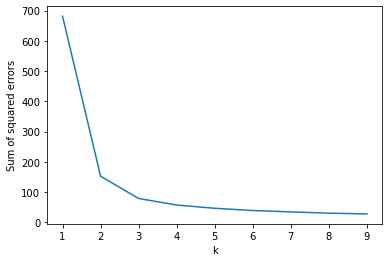

In [6]:
plt.xlabel("k")
plt.ylabel("Sum of squared errors")
plt.plot(k_rng,sse)

By showing above plot we can say that 3 clusters are there and now you also know why it is known as "Elbow" method 

In [7]:
df['flowers'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flowers
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Make clusters using sepal length and width

In [8]:
new_df = df.drop(['petal length (cm)','petal width (cm)','flowers'],axis='columns')
new_df.head(3)

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2


In [9]:
km = KMeans(n_clusters = 3)
yp = km.fit_predict(new_df)
yp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [10]:
new_df['clusters'] = yp
new_df.head(2)

,sepal length (cm),sepal width (cm),clusters
0,5.1,3.5,0
1,4.9,3.0,0


In [11]:
new_df.clusters.unique()

array([0, 1, 2])

In [12]:
df1 = new_df[new_df.clusters==0]
df2 = new_df[new_df.clusters==1]
df3 = new_df[new_df.clusters==2]

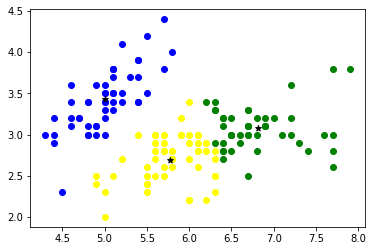

In [13]:
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='green')
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')

### Make clusters using petal length and width

In [14]:
new_df1 = df.drop(['sepal length (cm)','sepal width (cm)','flowers'],axis='columns')
new_df1.head(3)

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2


In [15]:
km = KMeans(n_clusters = 3)
yp1 = km.fit_predict(new_df1)
yp1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
new_df1['clusters'] = yp1
new_df1.head(2)

,petal length (cm),petal width (cm),clusters
0,1.4,0.2,0
1,1.4,0.2,0


In [17]:
new_df1.clusters.unique()

array([0, 2, 1])

In [18]:
df4 = new_df1[new_df1.clusters==0]
df5 = new_df1[new_df1.clusters==1]
df6 = new_df1[new_df1.clusters==2]

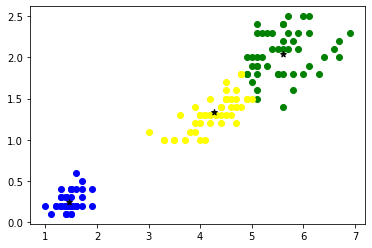

In [19]:
plt.scatter(df4['petal length (cm)'],df4['petal width (cm)'],color='blue')
plt.scatter(df5['petal length (cm)'],df5['petal width (cm)'],color='green')
plt.scatter(df6['petal length (cm)'],df6['petal width (cm)'],color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')